# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

Hipótesis 1: Los lenguajes web son los asociados a mejores salarios

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [3]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


In [5]:
for col_name in df.columns:
    print(col_name)

# print(*df.columns)

profile_gender
profile_age
work_country
work_province
profile_years_experience
work_years_in_company
work_years_in_current_position
work_people_in_charge_of
profile_studies_level
profile_studies_level_state
profile_career
profile_university
profile_specialization_courses
profile_open_source_contributions
profile_programming_as_hobby
work_role
tools_platform
tools_programming_languages
tools_frameworks
tools_data_bases
tools_qa_testing
tools_IDEs
tools_work_pc_os
tools_cellphone_os
work_on_call_duty
salary_on_call_duty_charge
work_on_call_duty_charge_type
work_contract_type
salary_monthly_BRUTO
salary_monthly_NETO
salary_in_usd
salary_satisfaction
salary_comparison_last_semester
salary_has_bonus
salary_bonus_tied_to
salary_inflation_adjustment_2020
salary_percentage_inflation_adjustment_2020
salary_month_last_inflation_adjustment
work_has_violence_situations
profile_sexual_orientation
profile_has_disabilities
profile_has_disabilities_hiring_difficulties
company_employee_number
company_m

In [6]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

In [7]:
df[relevant_columns]

,tools_programming_languages,salary_monthly_NETO
0,Ninguno,43000.000
1,"HTML, Javascript, Python",63000.000
2,Ninguno,127000.000
3,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.000
4,"CSS, HTML, Javascript, SQL, TypeScript",106000.000
...,...,...
6090,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.000
6091,Ninguno de los anteriores,71000.000
6092,Ninguno de los anteriores,45.753
6093,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.000


In [8]:
df.tools_programming_languages

0                                                 Ninguno
1                                HTML, Javascript, Python
2                                                 Ninguno
3       Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4                  CSS, HTML, Javascript, SQL, TypeScript
                              ...                        
6090    .NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...
6091                            Ninguno de los anteriores
6092                            Ninguno de los anteriores
6093     C, C++, HTML, Java, Javascript, PHP, Python, SQL
6094                            Ninguno de los anteriores
Name: tools_programming_languages, Length: 6095, dtype: object

In [10]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
    if not isinstance(languages_str, str):
        return []
    # Remove 'other' option
    languages_str = languages_str.lower().replace('ninguno de los anteriores', '')
    # Split string into list of items
    # Remove spaces and commas for each item
    return [lang.strip().replace(',', '') for lang in languages_str.split()]

In [26]:
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages.apply(split_languages)

if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

df_lang = df.cured_programming_languages\
.apply(pd.Series)\
.stack()\
.reset_index(level=-1, drop=True)\
.to_frame()\
.join(df[relevant_columns])\
.rename(columns={0: 'programming_language'})

df_lang = df_lang[df_lang.salary_monthly_NETO > 20000]
df_lang.salary_monthly_NETO.min(), df_lang.salary_monthly_NETO.max()

(10700.0, 2080000.0)

In [30]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
# filtro lenguaje ninguno y con frecuencia mayor a 10
language_count

,language,frequency
0,javascript,2324
1,sql,2017
2,html,1722
3,python,1383
4,java,1365
...,...,...
193,plc,1
194,soy,1
195,m,1
196,soql,1


In [31]:
language_filtered = language_count[(language_count.language != 'ninguno') & (language_count.frequency >= 10)]
language_filtered.describe()

,frequency
count,38.000000
mean,425.842105
std,618.663884
min,10.000000
25%,33.750000
50%,101.000000
75%,712.000000
max,2324.000000


In [32]:
interesting_languages = language_filtered.language
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [33]:
filtered_df_lang.programming_language.describe()

count          16182
unique            38
top       javascript
freq            2324
Name: programming_language, dtype: object

/home/exequiel/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'javascript'),
 Text(1, 0, 'sql'),
 Text(2, 0, 'html'),
 Text(3, 0, 'python'),
 Text(4, 0, 'java'),
 Text(5, 0, 'css'),
 Text(6, 0, 'bash/shell'),
 Text(7, 0, 'php'),
 Text(8, 0, '.net'),
 Text(9, 0, 'typescript'),
 Text(10, 0, 'c#'),
 Text(11, 0, 'go'),
 Text(12, 0, 'c++'),
 Text(13, 0, 'c'),
 Text(14, 0, 'vba'),
 Text(15, 0, 'kotlin'),
 Text(16, 0, 'groovy'),
 Text(17, 0, 'ruby'),
 Text(18, 0, 'scala'),
 Text(19, 0, 'swift'),
 Text(20, 0, 'r'),
 Text(21, 0, 'cobol'),
 Text(22, 0, 'abap'),
 Text(23, 0, 'perl'),
 Text(24, 0, 'objective-c'),
 Text(25, 0, 'delphi'),
 Text(26, 0, 'powershell'),
 Text(27, 0, 'dart'),
 Text(28, 0, 'actionscript'),
 Text(29, 0, 'assembler'),
 Text(30, 0, 'matlab'),
 Text(31, 0, 'apex'),
 Text(32, 0, 'smalltalk'),
 Text(33, 0, 'pl/sql'),
 Text(34, 0, 'rust'),
 Text(35, 0, 'genexus'),
 Text(36, 0, 'no'),
 Text(37, 0, 'visual')]

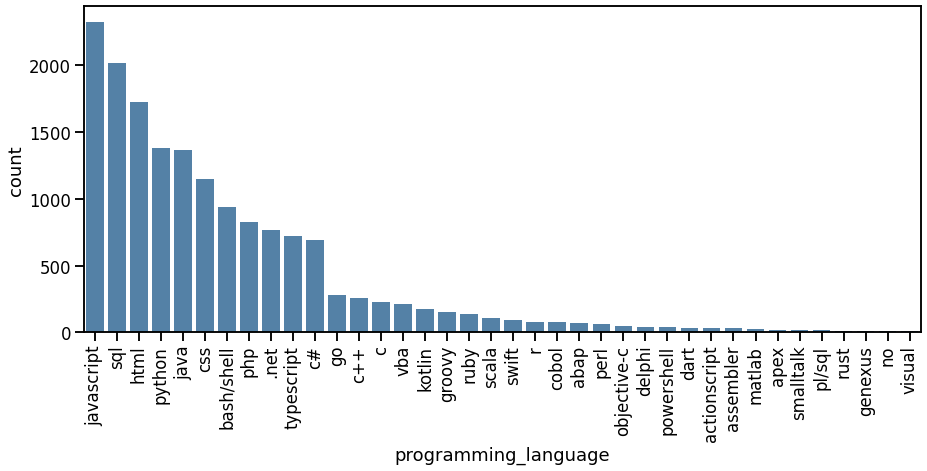

In [34]:
fig = plt.figure(figsize=(15,6))
g = seaborn.countplot(filtered_df_lang.programming_language, color='steelblue', order=interesting_languages)
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

In [51]:
df.salary_monthly_NETO[df.salary_monthly_NETO > 1000000]

1493    1300000.0
1727    1250000.0
1996    1190000.0
2774    1600000.0
2895    1500000.0
3358    1066000.0
4350    1030000.0
4486    2080000.0
Name: salary_monthly_NETO, dtype: float64

In [39]:
data_filtered = filtered_df_lang[(filtered_df_lang['salary_monthly_NETO'] < 400000)\
& (filtered_df_lang['salary_monthly_NETO'] > 100000)]
data_filtered

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...
6080,vba,"Assembler, Bash/Shell, C++, HTML, Java, PHP, P...",391000.0,"[assembler, bash/shell, c++, html, java, php, ..."
6087,python,Python,120000.0,[python]
6089,bash/shell,"Bash/Shell, Python, SQL",130000.0,"[bash/shell, python, sql]"
6089,python,"Bash/Shell, Python, SQL",130000.0,"[bash/shell, python, sql]"


In [276]:
data_filtered.describe()

,salary_monthly_NETO
count,12715.000000
mean,107452.999100
std,57140.963361
min,50032.000000
25%,72000.000000
50%,91000.000000
75%,120000.000000
max,397000.000000


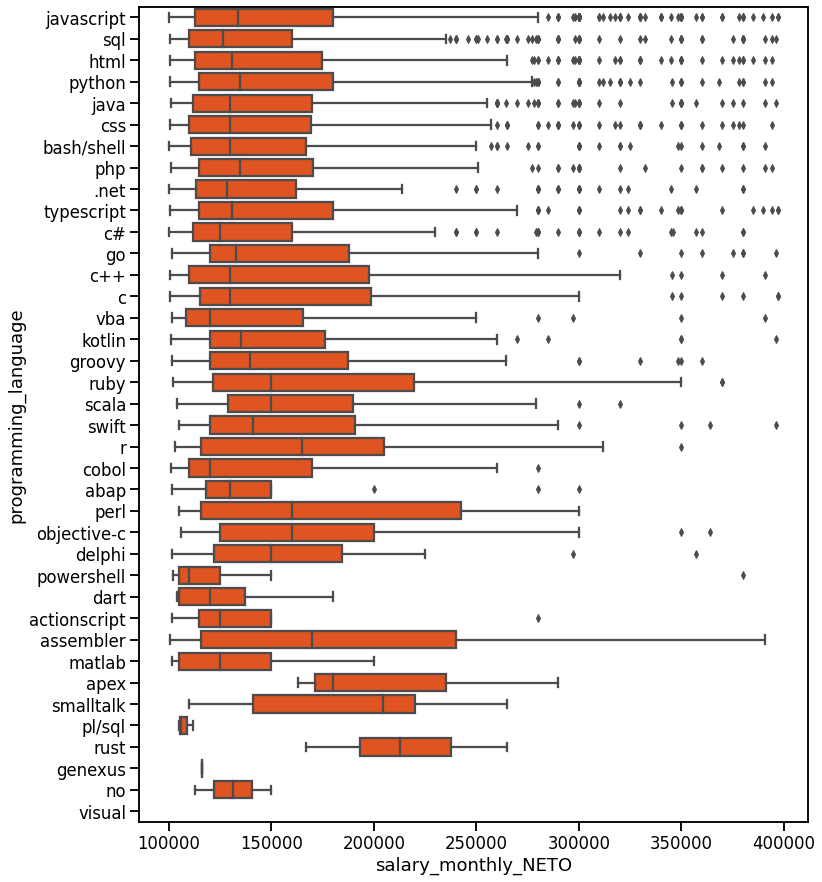

In [40]:
plt.figure(figsize=(12, 15))
seaborn.boxplot(data=data_filtered, x='salary_monthly_NETO', y='programming_language',
                color='orangered', order=interesting_languages)
plt.ticklabel_format(style='plain', axis='x')

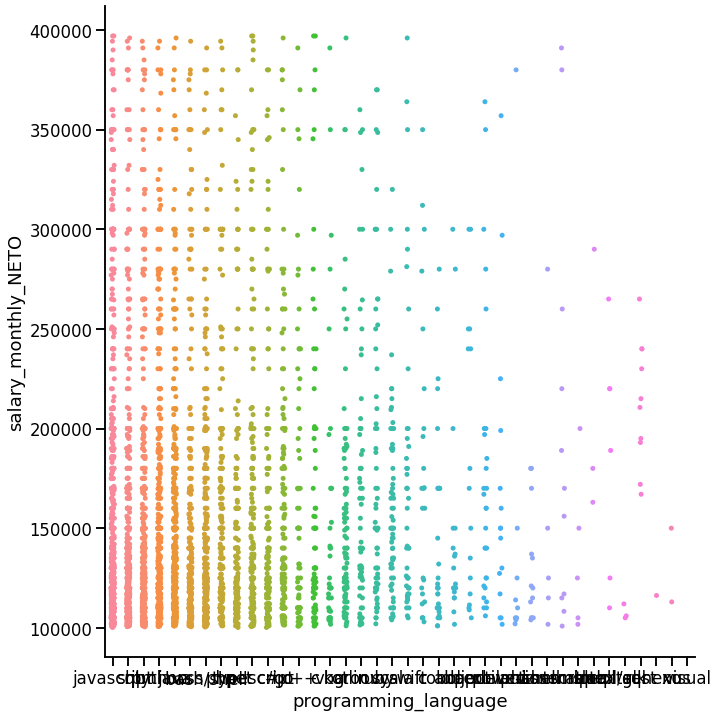

In [41]:
seaborn.catplot(
    x='programming_language',
    y='salary_monthly_NETO',
    data=data_filtered,
    order=interesting_languages,
    height=10)

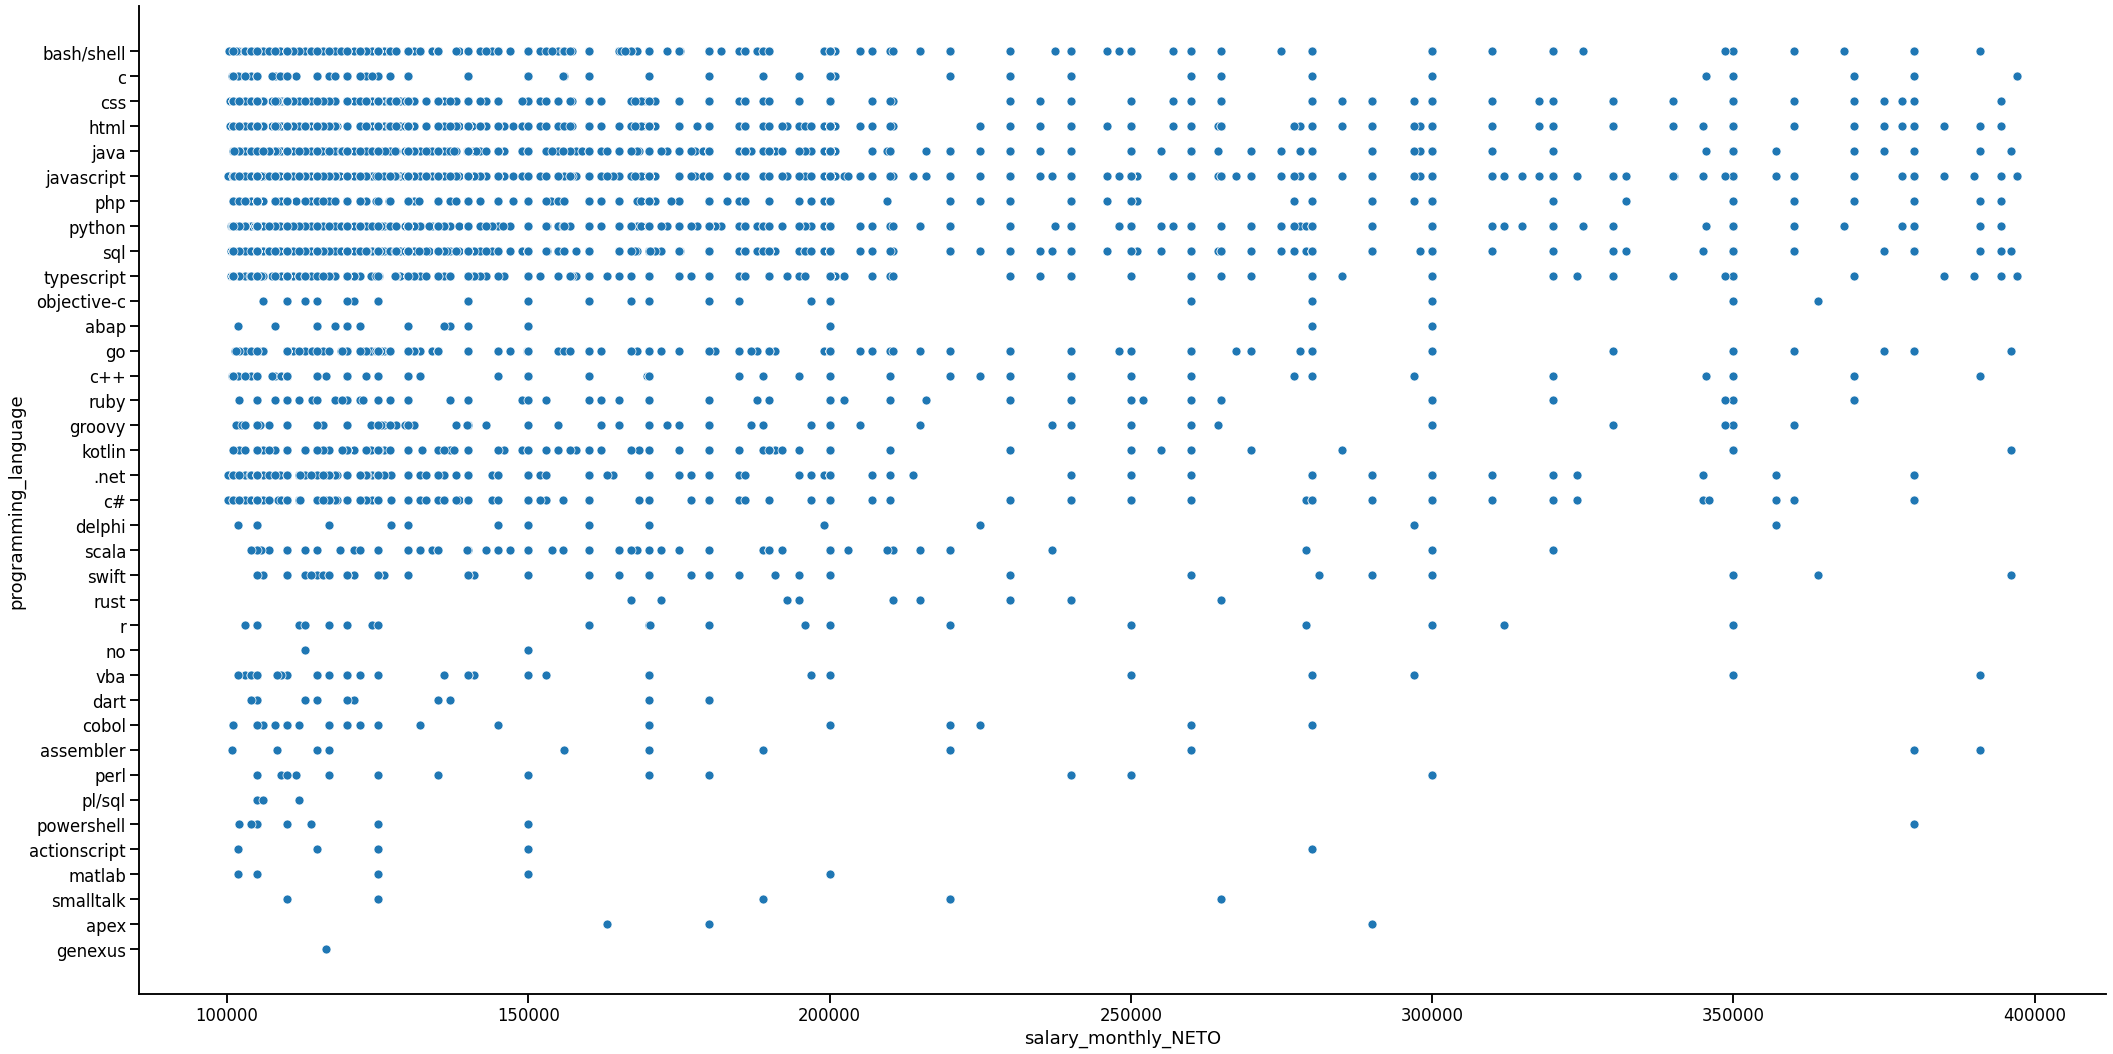

In [42]:
seaborn.pairplot(data=data_filtered,
                 y_vars='programming_language',
                 x_vars='salary_monthly_NETO',
                 aspect=2, height=15)

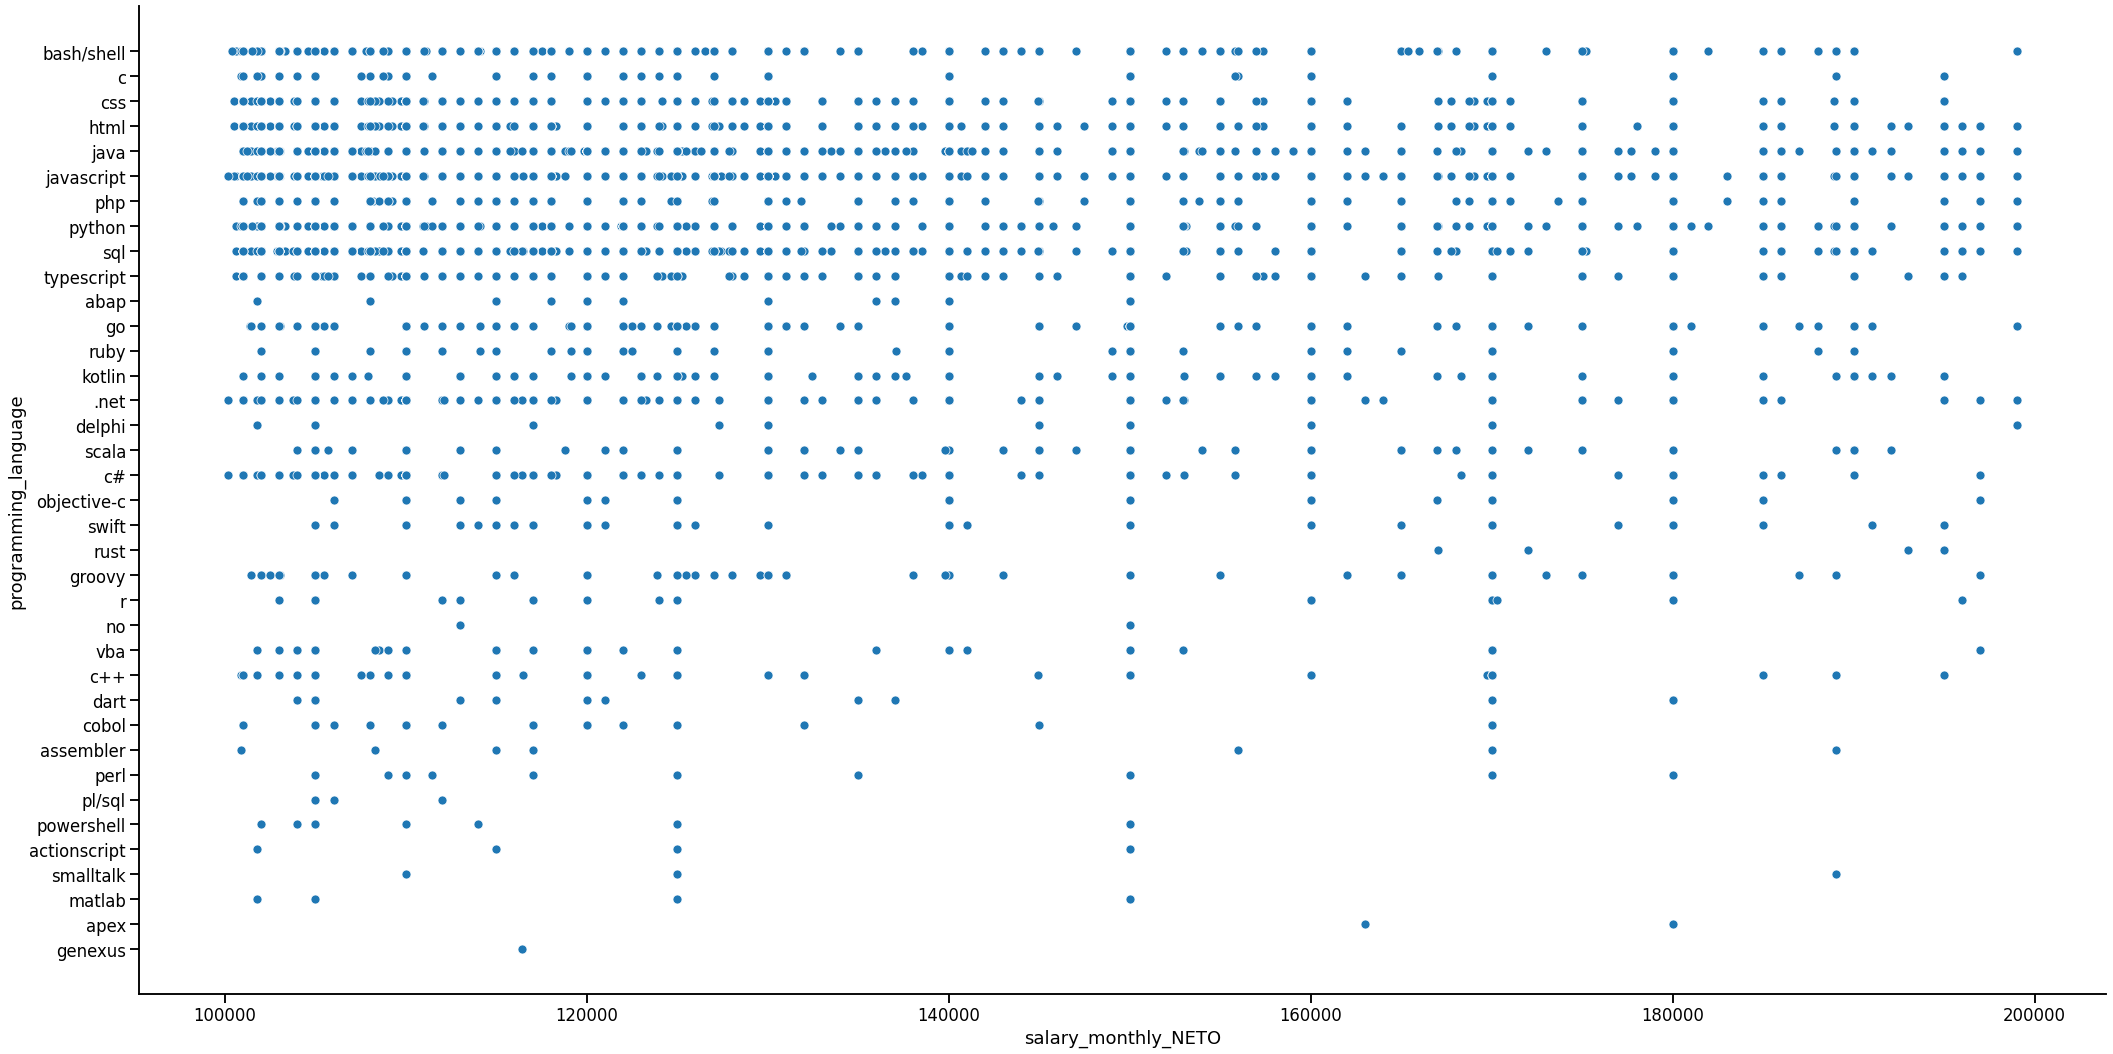

In [43]:
seaborn.pairplot(data=data_filtered[(data_filtered.salary_monthly_NETO < 200000)],
                 y_vars='programming_language',
                 x_vars='salary_monthly_NETO',
                 aspect=2, height=15)

In [292]:
data_filtered.sort_values('salary_monthly_NETO')

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
5704,javascript,"CSS, HTML, Javascript",50032.00,"[css, html, javascript]"
5704,html,"CSS, HTML, Javascript",50032.00,"[css, html, javascript]"
5704,css,"CSS, HTML, Javascript",50032.00,"[css, html, javascript]"
383,python,Python,50069.76,[python]
40,bash/shell,"Bash/Shell, CSS, HTML, Javascript, PHP",50138.00,"[bash/shell, css, html, javascript, php]"
...,...,...,...,...
3352,javascript,"C, Javascript, TypeScript",397000.00,"[c, javascript, typescript]"
3352,c,"C, Javascript, TypeScript",397000.00,"[c, javascript, typescript]"
3351,typescript,"C, Javascript, TypeScript",397000.00,"[c, javascript, typescript]"
3351,javascript,"C, Javascript, TypeScript",397000.00,"[c, javascript, typescript]"


## los que mas cobran, cuál es el lenguaje que sabe